In [1]:
import pandas as pd 
from importlib import reload
import trimps
reload(trimps)
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import tendo_calculations

In [2]:
df_to_write = pd.read_csv('big_file.csv', delimiter=';')
df_to_write = df_to_write.rename(columns={'ID':'id'})

df_tendo = tendo_calculations.read_tendo_file('tendo.csv')


#df_tendo.loc[df_tendo['acc']<-10, 'delta_v'] = 0

In [3]:
trimps_functions = {
    'total_work_done': 'session_TWD',
    'tonnage': 'session_tonnage',
    'impuls': 'session_impulse',
    'total_work_done_exponational_weighted': 'session_TWD_exp'
}

df_tendo = df_tendo[df_tendo['training'] != 'LP_HYP_5x12']

session_data = {}
for trimps_function, variable_name in trimps_functions.items():
    session_data[variable_name] = df_tendo.groupby(['pp', 'training']).apply(getattr(trimps, trimps_function)).reset_index().rename(columns={0: variable_name})

merged_df = session_data['session_TWD']
for variable_name, df in session_data.items():
    if variable_name != 'session_TWD':  
        merged_df = merged_df.merge(df, on=['pp', 'training'])

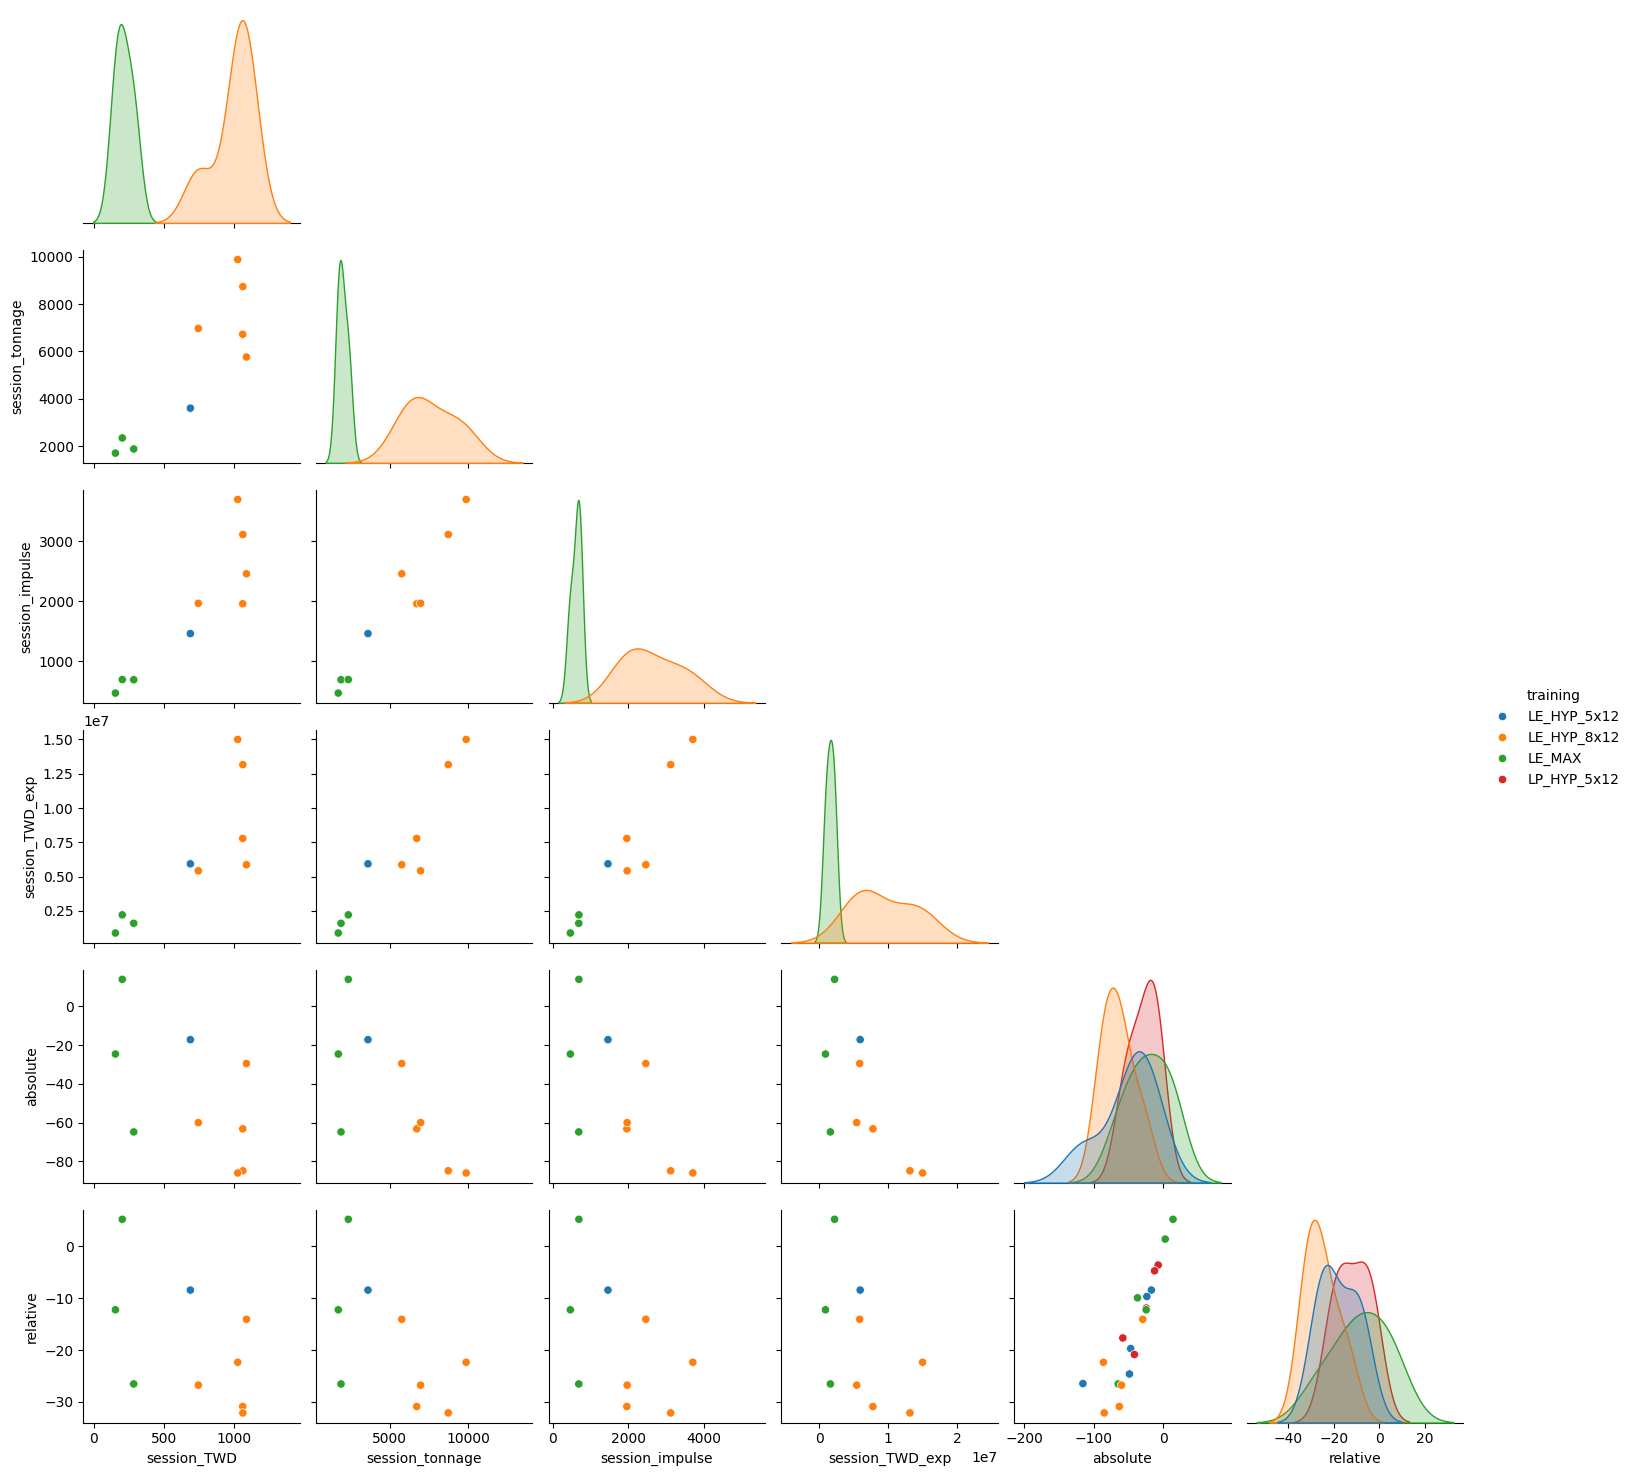

In [4]:
merged_df = merged_df.drop(merged_df[(merged_df['training'] == 'LE_HYP_5x12') & (merged_df['pp'] == 3)].index)
merged_df = merged_df.drop(merged_df[(merged_df['training'] == 'LE_HYP_5x12') & (merged_df['pp'] == 4)].index)



merged_df = merged_df.rename(columns={
    'pp':'id'
})


output = merged_df.merge(df_to_write, on=['id','training'], how='right')
output = output.drop(columns=['id'])
#output.to_csv('final.csv')
#output = output[output['training'] != 'LP_HYP_5x12']

sns.pairplot(output, hue='training', kind='scatter', diag_kind='kde', corner=True)

<Axes: >

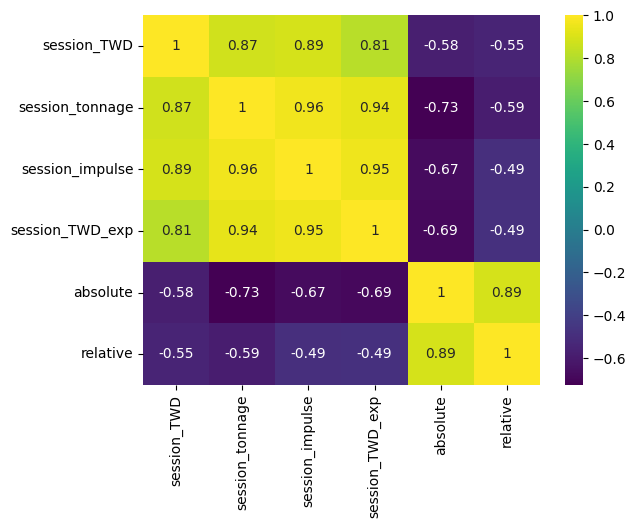

In [5]:
#output = output[output['training'] != 'LP_HYP_5x12']




filtered = output.drop(columns=['training'])
mask = np.triu(np.ones_like(filtered.corr(), dtype=bool))
corr_df = filtered.corr()
sns.heatmap(corr_df, annot=True, cmap=('viridis'))#, mask=mask)

In [6]:

final_df = pd.read_csv('final.csv')
output = merged_df.merge(final_df, on=['id','training'], how='right')
output.to_csv('final.csv')

C:\Users\Simon\AppData\Local\Temp\ipykernel_45320\1947380359.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'session_TWD_exp_y', 'session_impulse_y', 'session_TWD_y', 'session_tonnage_y'} in the result is deprecated and will raise a MergeError in a future version.
  output = merged_df.merge(final_df, on=['id','training'], how='right')
